# **Preparación del notebook**

In [80]:
from google.colab import drive
import sys
import os
import matplotlib.pyplot as plt
import pandas as pd

In [81]:
#Conectar al drive local
drive.mount('/content/drive')
#Conectar al repositorio
path = '/content/drive/My Drive/cod/CA_inventarios'
sys.path.append(path) #para importar las funciones propias a través de import, porque incluye la carpeta del repositorio como uno de esos paquetes para que import busque funciones
os.chdir(path) #para que suba y descargue archivos de la ruta del repositorio de trabajo

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
#Crear los df's de cada hoja del libro de excel
import pandas as pd
hojas_excel = pd.read_excel('/content/drive/My Drive/cod/CA_inventarios/data/bd_caso.xlsx', sheet_name=["Inventario inicial", "Salidas", "Entradas", "Maestro de materiales"])
df_inventario_inicial = hojas_excel["Inventario inicial"]
df_salidas = hojas_excel["Salidas"]
df_entradas = hojas_excel["Entradas"]
df_maestro_materiales = hojas_excel["Maestro de materiales"]

In [83]:
#Conectarse al colab de funciones
%run a_funciones.ipynb

# **Exploración y tratamiento**

## Visualización de los df's

In [84]:
df_inventario_inicial.head()

,SKU,Inventario Inicial (Cajas)
0,13569,3
1,13970,574
2,13980,2380
3,17070,74
4,17090,150


In [85]:
df_salidas.head()

,Transporte,Pedido,Entrega,Destinat.,Material,CANT,Dia,Hora,Cajas por Pallet
0,30113428,13515,92389141,13515,18375,100.0,2012-11-26,07:00:00,33
1,30113428,13515,92389141,13515,20176,5.0,2012-11-26,07:00:00,25
2,30113428,13515,92389141,13515,21250,6.0,2012-11-26,07:00:00,18
3,30113428,13515,92389141,13515,21261,60.0,2012-11-26,07:00:00,28
4,30113428,13515,92389141,13515,31002,2.0,2012-11-26,07:00:00,80


In [86]:
df_entradas.head()

,Material,Cajas,Documento de recibo,Fecha,Hora
0,20176,30.0,41239,2012-11-21,09:00:00
1,34259,6.0,41239,2012-11-21,09:00:00
2,34377,1.0,41239,2012-11-21,09:00:00
3,43564,3.0,41239,2012-11-21,09:00:00
4,71101,266.0,41239,2012-11-21,09:00:00


In [87]:
df_maestro_materiales.head()

,Material,Cajas por Pallet,Categoría,m3 por caja,Valor de la mercancía por caja,Kg por caja,Tamaño/Dimensión
0,13569,55,CARNES Y CARNES FRIAS,"0,047 M3",194444,"7,050 KG",600X400X196
1,13970,44,BEBIDAS NO ALCOHOLICAS,"0,049 M3",128660,"6,090 KG",500X500X196
2,13980,66,"GALLETERIA, CONFITERIA Y CHOCOLATES","0,039 M3",151408,"4,560 KG",510X390X196
3,17070,240,PANADERIA INDUSTRIAL,"0,008 M3",298914,"2,120 KG",295X195X140
4,17090,180,COSMETICOS,"0,011 M3",161853,"2,850 KG",350X190X140


## Cambio de nombre en los df's para que en todos los productos se llamen SKU

In [88]:
df_maestro_materiales.rename(columns={'Material': 'SKU'}, inplace=True)
df_salidas.rename(columns={'Material': 'SKU'}, inplace=True)
df_entradas.rename(columns={'Material': 'SKU'}, inplace=True)

## Validación de filas duplicados, datos nulos, dastos '-' y otros errores

In [89]:
for df, nombre in [(df_inventario_inicial, 'Inventario inicial'),(df_salidas, 'Salidas'),
                   (df_entradas, 'Entradas'), (df_maestro_materiales, 'Maestro de materiales')]:

    print(f'\n{"="*40}')
    print(f'Análisis del DataFrame: {nombre}')
    print(f'\n{"="*40}')

    print('\n📝 Tipos de datos:')
    print(df.dtypes)

    print('\n❌ Valores nulos por columna:')
    print(df.isnull().sum())

    print('\n Cantidad de filas duplicadas:')
    print(df.duplicated().sum())

    print('\n Filas con valores no numéricos (como "-", ".", vacíos):')
    for col in df.columns:
        # Revisar filas con valores "-", ".", o vacíos
        invalid_values = df[col].isin(['-', '.', '']).sum()
        if invalid_values >0:
            print(f'  ⚠️ Columna "{col}" tiene {invalid_values} filas con valores no válidos (como "-", ".", vacíos)')
        else:
            print(f'  ✅ Columna "{col}" = 0')



Análisis del DataFrame: Inventario inicial


📝 Tipos de datos:
SKU                           int64
Inventario Inicial (Cajas)    int64
dtype: object

❌ Valores nulos por columna:
SKU                           0
Inventario Inicial (Cajas)    0
dtype: int64

 Cantidad de filas duplicadas:
0

 Filas con valores no numéricos (como "-", ".", vacíos):
  ✅ Columna "SKU" = 0
  ✅ Columna "Inventario Inicial (Cajas)" = 0

Análisis del DataFrame: Salidas


📝 Tipos de datos:
Transporte                   int64
Pedido                       int64
Entrega                      int64
Destinat.                    int64
SKU                          int64
CANT                       float64
Dia                 datetime64[ns]
Hora                        object
Cajas por Pallet             int64
dtype: object

❌ Valores nulos por columna:
Transporte          0
Pedido              0
Entrega             0
Destinat.           0
SKU                 0
CANT                0
Dia                 0
Hora              

## Análisis de las filas duplicadas del DataFrame 'Salidas'

In [90]:
# Mostrar las filas duplicadas en df_salidas
duplicados_salidas = df_salidas[df_salidas.duplicated(keep=False)]
duplicados_salidas

,Transporte,Pedido,Entrega,Destinat.,SKU,CANT,Dia,Hora,Cajas por Pallet
1016,30113434,15270,92389289,15270,44431,1.0,2012-11-27,07:00:00,187
1017,30113434,15270,92389289,15270,44431,1.0,2012-11-27,07:00:00,187
1062,30113464,12581,92389298,12581,21350,18.0,2012-11-27,08:04:00,18
1063,30113464,12581,92389298,12581,21350,18.0,2012-11-27,08:04:00,18
1064,30113464,12581,92389298,12581,21350,18.0,2012-11-27,08:04:00,18
...,...,...,...,...,...,...,...,...,...
76783,30117260,20768,92398526,20768,18043,44.0,2013-02-22,09:44:00,44
76787,30117260,20768,92398526,20768,18128,44.0,2013-02-22,09:44:00,44
76788,30117260,20768,92398526,20768,18128,44.0,2013-02-22,09:44:00,44
77452,30117325,12226,92398599,12226,34250,4.0,2013-02-23,12:57:00,72


In [91]:
# Agruparlas para ver cuáles están repetidas y cuántas veces
duplicados_agrupados = duplicados_salidas.groupby(list(df_salidas.columns)).size().reset_index(name='repeticiones')
duplicados_agrupados

,Transporte,Pedido,Entrega,Destinat.,SKU,CANT,Dia,Hora,Cajas por Pallet,repeticiones
0,30113434,15270,92389289,15270,44431,1.0,2012-11-27,07:00:00,187,2
1,30113464,12581,92389298,12581,21350,18.0,2012-11-27,08:04:00,18,4
2,30113469,21626,92389261,21626,43571,2.0,2012-11-27,14:13:00,280,2
3,30113479,12581,92389318,12581,18451,55.0,2012-11-27,10:00:00,55,3
4,30113490,12226,92389302,12226,44501,7.0,2012-11-27,09:28:00,96,2
...,...,...,...,...,...,...,...,...,...,...
198,30117260,20768,92398526,20768,18043,44.0,2013-02-22,09:44:00,44,2
199,30117260,20768,92398526,20768,18128,44.0,2013-02-22,09:44:00,44,2
200,30117275,17189,92398524,17189,18043,44.0,2013-02-22,08:59:00,44,2
201,30117275,17189,92398524,17189,18128,44.0,2013-02-22,08:59:00,44,6


 **Justificación de filas duplicadas en el DataFrame de Salidas:**

En el contexto logístico del caso BigMarket, es completamente plausible que ciertos registros de salida se repitan. Lo más probable es que esos duplicados representen varios despachos iguales de un mismo producto, en las mismas condiciones (misma cantidad, fecha, almacén, etc.).

# **Estadística descriptiva**

Del df de inventario inicial puedo entender cómo se distribuye el inventario actual para estimar el tamaño de bodega y diseñar zonas de almacenamiento, por ejemplo:
¿Qué categorías ocupan más espacio? ¿Qué SKUs requieren más capacidad? Para definir espacio por categoría y tipo de producto.
Estos probablemente requieran zonas de alta rotación o espacio más accesible.

In [92]:
# Convertir los SKUs a cadenas de texto pues estas son categorías y también con la intención de que no presente conflicto con plt.bar()
df_inventario_inicial['SKU'] = df_inventario_inicial['SKU'].astype(str)

In [93]:
# Ordenamos el DataFrame en orden de mayor a menor según la columna 'Inventario Inicial (Cajas)'
df_inventario_inicial = df_inventario_inicial.sort_values(by='Inventario Inicial (Cajas)', ascending=False)
df_inventario_inicial

,SKU,Inventario Inicial (Cajas)
15,18331,84565
8,18128,69582
5,18043,56112
291,71152,29718
264,49001,23472
...,...,...
320,72924,0
361,80490,0
390,95015,0
393,95150,0


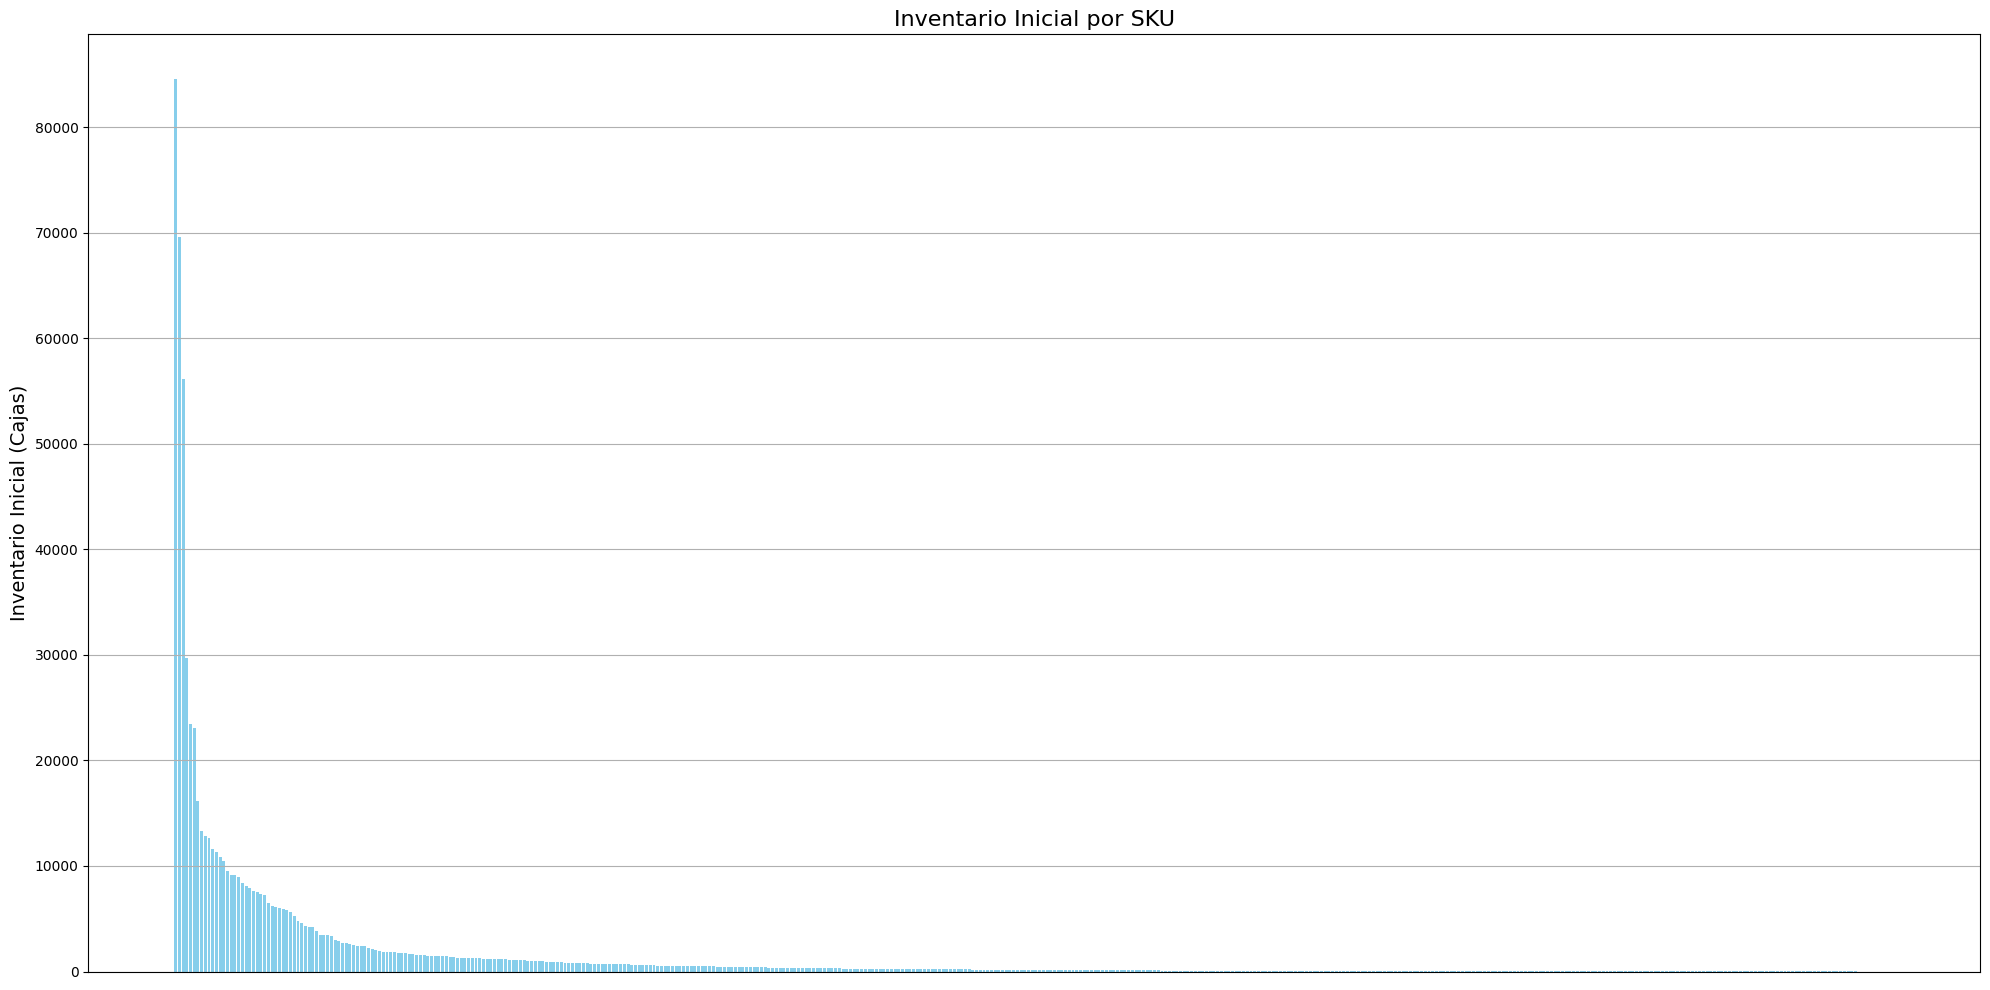

In [94]:
#Revisamos visualmente la distribución de los datos
plt.figure(figsize=(20, 10)) #Crear una figura
plt.bar(df_inventario_inicial['SKU'], df_inventario_inicial['Inventario Inicial (Cajas)'], color='skyblue') # Graficar los datos
plt.title('Inventario Inicial por SKU', fontsize=16) #Configurar títulos y etiquetas
plt.ylabel('Inventario Inicial (Cajas)', fontsize=14) #Configurar títulos y etiquetas
plt.xticks([])  #Esto elimina las etiquetas de los SKUs en el eje X
plt.grid(True) #Agregar una cuadrícula
plt.tight_layout()
plt.show()

Al analizar el inventario inicial por SKU, vemos que la mayoría de los productos tienen pocas cajas en stock, mientras que unos pocos tienen muchísimas. Esto genera una distribución muy desigual, donde unos cuantos SKUs concentran gran parte del inventario total.

Este tipo de comportamiento se puede asoiar con el principio de pareto donde afirmaríamos que con aproximadamente el 20% de los productos representariamos el 80% del total de inventario. Aplicando esta lógica, podríamos identificar fácilmente cuáles son los SKUs más importantes, aquellos que deberíamos priorizar en temas como almacenamiento, logística o disponibilidad en tiendas.

In [95]:
total_inventario = df_pareto['Inventario Inicial (Cajas)'].sum()
print(total_inventario)

719889


<ipython-input-102-aa1f4648b6f5>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_plot['SKU'], rotation=45, ha='right')


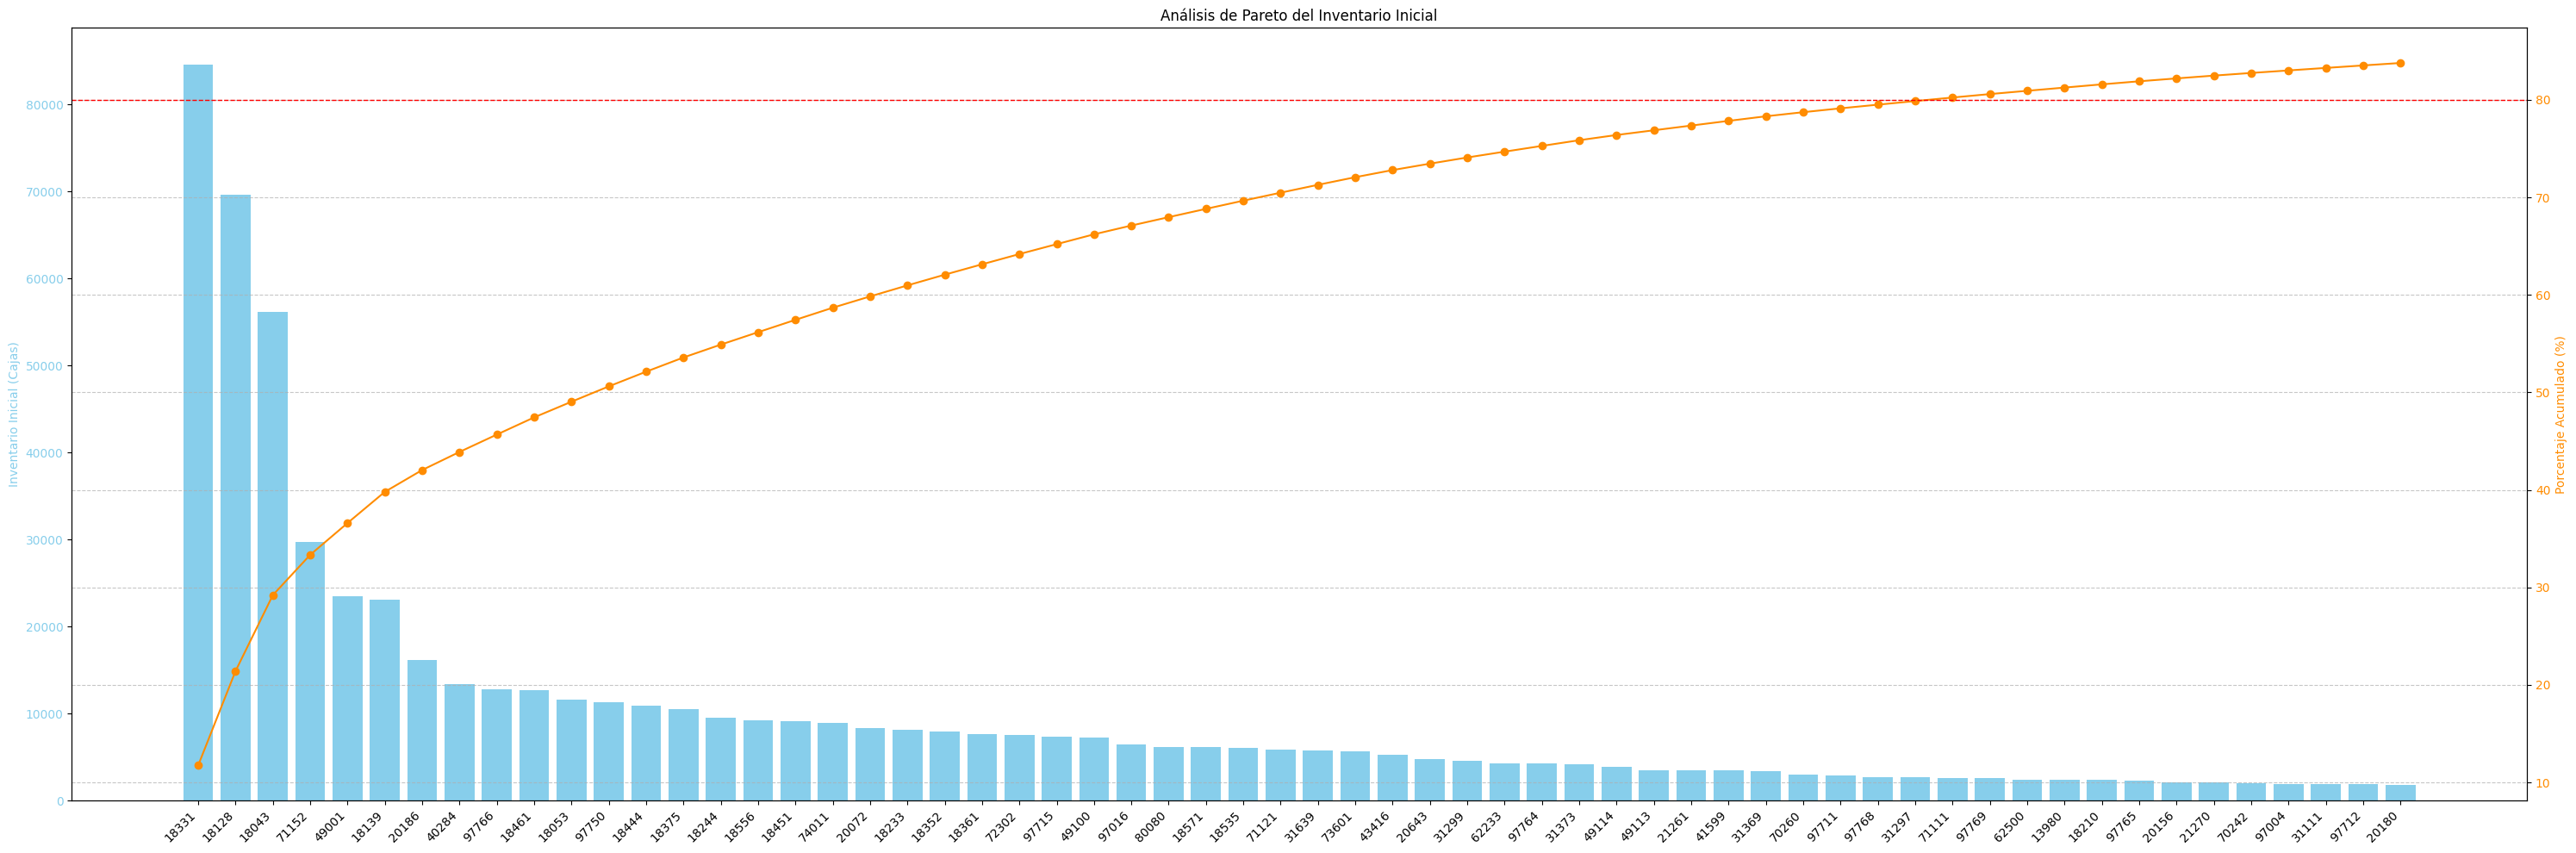

In [102]:
#Realizamos el pareto

df_pareto = df_inventario_inicial.sort_values(by='Inventario Inicial (Cajas)', ascending=False).copy()
df_pareto['Suma Acumulada'] = df_pareto['Inventario Inicial (Cajas)'].cumsum() #Crear fila de suma acumulada
df_pareto['Porcentaje Acumulado'] = (df_pareto['Suma Acumulada'] / total_inventario) * 100 #Crear fila de porcentaje acumulado

#Graficamos el pareto

df_plot = df_pareto.head(60) #Resulta necesario limitar la cantidad de SKU's a graficar para que la gráfica resulte visible

fig, ax1 = plt.subplots(figsize=(30, 10)) #Crear la figura y los ejes
ax1.bar(df_plot['SKU'], df_plot['Inventario Inicial (Cajas)'], color='skyblue') #Gráfico de barras (Inventario por SKU)1038543716
ax1.set_ylabel('Inventario Inicial (Cajas)', color='skyblue') #Etiquetas eje Y de barras al lado izquierdo
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(df_plot['SKU'], rotation=45, ha='right')

ax2 = ax1.twinx() #Crear un segundo eje Y para el porcentaje acumulado a la derecha
ax2.plot(df_plot['SKU'], df_plot['Porcentaje Acumulado'], color='darkorange', marker='o', linestyle='-')
ax2.set_ylabel('Porcentaje Acumulado (%)', color='darkorange') #Etiquetas eje Y de porcentaje acumulado al lado derecho
ax2.tick_params(axis='y', labelcolor='darkorange')
ax2.axhline(80, color='red', linestyle='--', linewidth=1)  # Línea para el 80% (regla de Pareto)

plt.title('Análisis de Pareto del Inventario Inicial') #Título y ajustes
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.show()

In [103]:
df_pareto.head(50)


,SKU,Inventario Inicial (Cajas),Suma Acumulada,Porcentaje Acumulado
15,18331,84565,84565,11.746950
8,18128,69582,154147,21.412607
5,18043,56112,210259,29.207142
291,71152,29718,239977,33.335278
264,49001,23472,263449,36.595781
9,18139,23037,286486,39.795857
39,20186,16108,302594,42.033425
137,40284,13352,315946,43.888155
418,97766,12827,328773,45.669957
25,18461,12686,341459,47.432174
